In [225]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sfdstcarpriceprediction/sample_submission.csv
/kaggle/input/sfdstcarpriceprediction/test.csv
/kaggle/input/dataset-all-2/all_data.csv
/kaggle/input/dataset3/data_3.csv
/kaggle/input/anton-data/dataset_encoded.csv
/kaggle/input/all-data-coded/all_data_coded.csv
/kaggle/input/dataset-all/all_data.csv


In [226]:
from pandas import Series
import pandas as pd
import numpy as np
from datetime import datetime
import re


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [228]:
DATA_DIR = '/kaggle/input/'
#df_train = pd.read_csv(DATA_DIR+'traintable/train.csv')
data = pd.read_csv(DATA_DIR+'all-data-coded/all_data_coded.csv')
sample_submission = pd.read_csv(DATA_DIR+'sfdstcarpriceprediction/sample_submission.csv')

In [229]:
sample_submission.sample(10)

,sell_id,price
20405,1089307548,0
32773,1084249371,0
27328,1097118518,0
13308,1095197638,0
25159,1094324748,0
14634,1093662140,0
24708,1099237610,0
10567,1101161454,0
11819,1101298528,0
4892,1100123186,0


In [230]:
data.sample(10).T

,58212,39374,38890,22388,60748,10307,16854,29310,72995,7106
Unnamed: 0,5.821300e+04,3.937400e+04,3.889000e+04,2.238800e+04,6.074900e+04,1.030700e+04,1.685400e+04,2.931000e+04,7.299600e+04,7.106000e+03
enginePower,-8.192567e-01,-1.124599e+00,-4.460608e-01,5.152014e-01,-1.463868e+00,-6.155590e-02,1.318138e+00,6.297906e-03,2.007985e+00,6.735270e-01
mileage,-7.290670e-01,-3.274513e-01,-1.154383e+00,-4.138749e-01,-4.342099e-01,8.468934e-01,5.011989e-01,-1.262697e+00,3.893565e-01,-1.069678e+00
productionDate,4.078632e-01,8.333071e-01,1.116936e+00,4.078632e-01,-3.012098e-01,2.660486e-01,-7.266536e-01,1.116936e+00,2.660486e-01,9.751217e-01
sell_id,1.102699e+09,1.102034e+09,1.102842e+09,1.096052e+09,1.102905e+09,1.101111e+09,1.101290e+09,1.101320e+09,1.101397e+09,1.101308e+09
vendor,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
Владельцы,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
ПТС,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Руль,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
sample,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00


In [231]:
data['sell_id'].value_counts()

1088492252    3
1099833872    2
1099077006    2
1089692981    2
1072669146    2
             ..
1101294744    1
1101215298    1
1101036698    1
1102845442    1
1102802100    1
Name: sell_id, Length: 73715, dtype: int64

In [232]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [233]:
# Сохраним загруженный датасет под отдельной переменной, чтобы была возможность бэкапа.
data_copy = data.copy()

<AxesSubplot:>

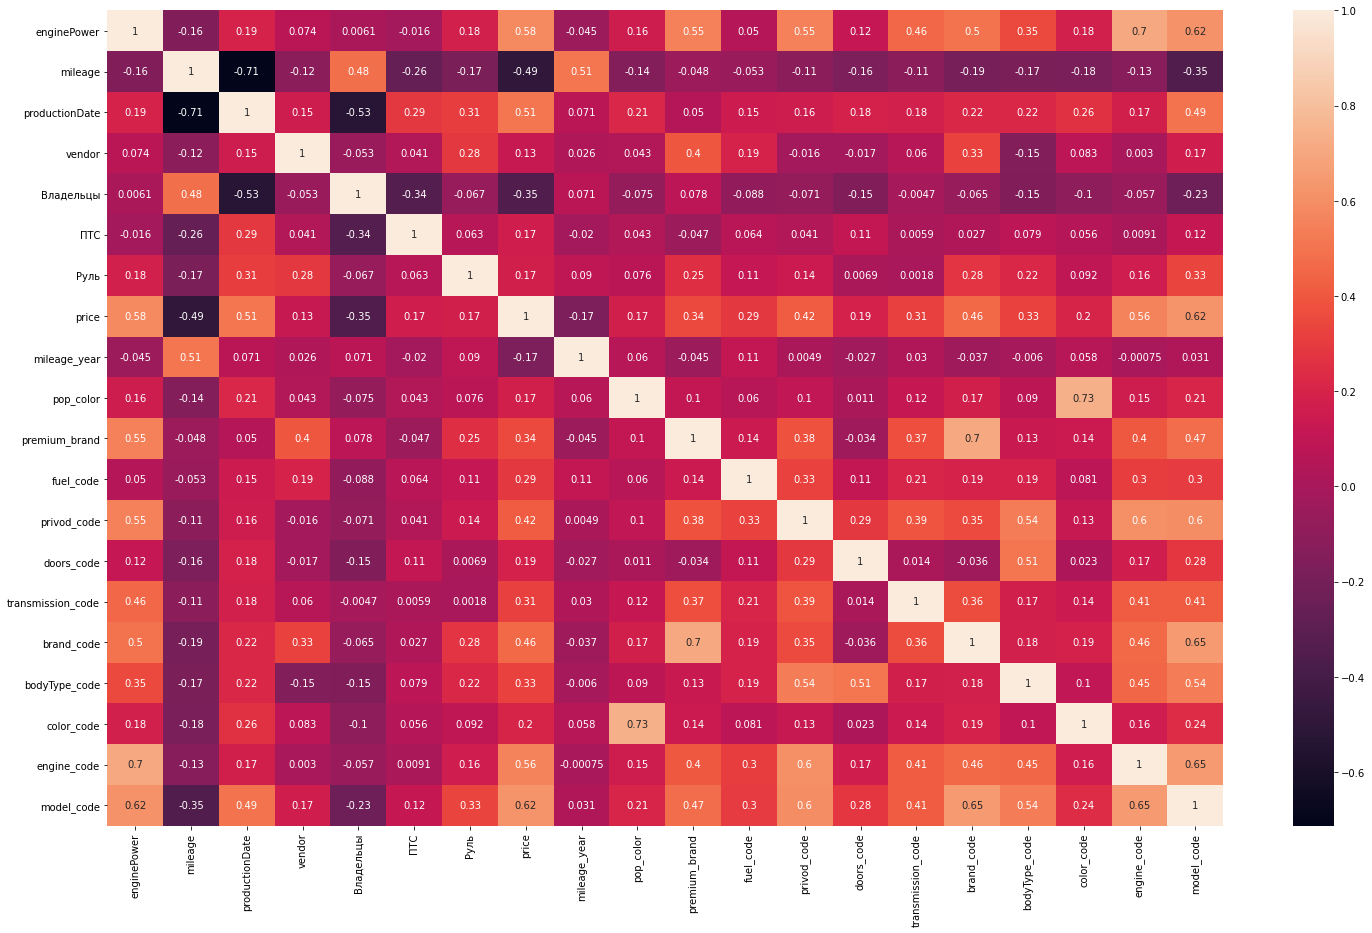

In [234]:
plt.rcParams['figure.figsize'] = (25,15)
sns.heatmap((data[data['sample']==1]).drop(['sell_id', 'sample'], axis=1).corr(), annot=True)

При кодировании категориальных признаков котегориям присваивались числовые значения в соответствии со средней ценой по данной категории (чем выше средняя цена, тем больше число). В этом случае не учитывается реальная разница в средней цене между категориями. Ниже рассмотрим вариант кодирования, когда категория кодируется средней ценой.

In [235]:
table_fuel = pd.pivot_table(data[data['sample']==1], values='price', index=['fuel_code'], aggfunc=np.mean).sort_values('price')
fuel_rank = table_fuel.index.to_list()

def fuel_encoding(row):
    for count, fuel in enumerate(fuel_rank):
        if row['fuel_code'] == fuel:
            return table_fuel.loc[count]['price']
        else:
            continue
data['fuel_mean_price'] = data.apply(fuel_encoding, axis=1)


In [236]:
table_privod = pd.pivot_table(data[data['sample']==1], values='price', index=['privod_code'], aggfunc=np.mean).sort_values('price')
privod_rank = table_privod.index.to_list()

def privod_encoding(row):
    for count, name in enumerate(privod_rank):
        if row['privod_code'] == name:
            return table_privod.loc[count]['price']
        else:
            continue
data['privod_mean_price'] = data.apply(privod_encoding, axis=1)

In [237]:
table_doors = pd.pivot_table(data[data['sample']==1], values='price', index=['doors_code'], aggfunc=np.mean).sort_values('price')
doors_rank = table_doors.index.to_list()

def doors_encoding(row):
    for count, name in enumerate(doors_rank):
        if row['doors_code'] == name:
            return table_doors.loc[count]['price']
        else:
            continue
data['doors_mean_price'] = data.apply(doors_encoding, axis=1)

In [238]:
table_transmission = pd.pivot_table(data[data['sample']==1], values='price', index=['transmission_code'], aggfunc=np.mean).sort_values('price')
transmission_rank = table_transmission.index.to_list()

def transmission_encoding(row):
    for count, name in enumerate(transmission_rank):
        if row['transmission_code'] == name:
            return table_transmission.loc[count]['price']
        else:
            continue
data['transmission_mean_price'] = data.apply(transmission_encoding, axis=1)

In [239]:
table_brand = pd.pivot_table(data[data['sample']==1], values='price', index=['brand_code'], aggfunc=np.mean).sort_values('price')
brand_rank = table_brand.index.to_list()

def brand_encoding(row):
    for count, brand in enumerate(brand_rank):
        if row['brand_code'] == brand:
            return table_brand.loc[count]['price']
        else:
            continue
data['brand_mean_price'] = data.apply(brand_encoding, axis=1)

In [240]:
table_bodyType = pd.pivot_table(data[data['sample']==1], values='price', index=['bodyType_code'], aggfunc=np.mean).sort_values('price')
bodyType_rank = table_bodyType.index.to_list()

def bodyType_encoding(row):
    for count, body in enumerate(bodyType_rank):
        if row['bodyType_code'] == body:
            return table_bodyType.loc[count]['price']
        else:
            continue
data['bodyType_mean_price'] = data.apply(bodyType_encoding, axis=1)

In [241]:
table_color = pd.pivot_table(data[data['sample']==1], values='price', index=['color_code'], aggfunc=np.mean).sort_values('price')
color_rank = table_color.index.to_list()

def color_encoding(row):
    for count, color in enumerate(color_rank):
        if row['color_code'] == color:
            return table_color.loc[count]['price']
        else:
            continue
data['color_mean_price'] = data.apply(color_encoding, axis=1)

In [242]:
table_engine = pd.pivot_table(data_copy[data_copy['sample']==1], values='price', index=['engine_code'], aggfunc=np.mean).sort_values('price')
engine_rank = table_engine.index.to_list()

def engine_encoding(row):
    for count, engine in enumerate(engine_rank):
        if row['engine_code'] == engine:
            return table_engine.loc[count]['price']
        else:
            continue
data['engine_mean_price'] = data.apply(engine_encoding, axis=1)

In [247]:
data_1 = data.copy()

In [249]:
data.columns.to_list()

['enginePower',
 'mileage',
 'productionDate',
 'sell_id',
 'vendor',
 'Владельцы',
 'ПТС',
 'Руль',
 'sample',
 'price',
 'mileage_year',
 'pop_color',
 'premium_brand',
 'fuel_code',
 'privod_code',
 'doors_code',
 'transmission_code',
 'brand_code',
 'bodyType_code',
 'color_code',
 'engine_code',
 'model_code',
 'fuel_mean_price',
 'privod_mean_price',
 'doors_mean_price',
 'transmission_mean_price',
 'brand_mean_price',
 'bodyType_mean_price',
 'color_mean_price',
 'engine_mean_price']

<AxesSubplot:>

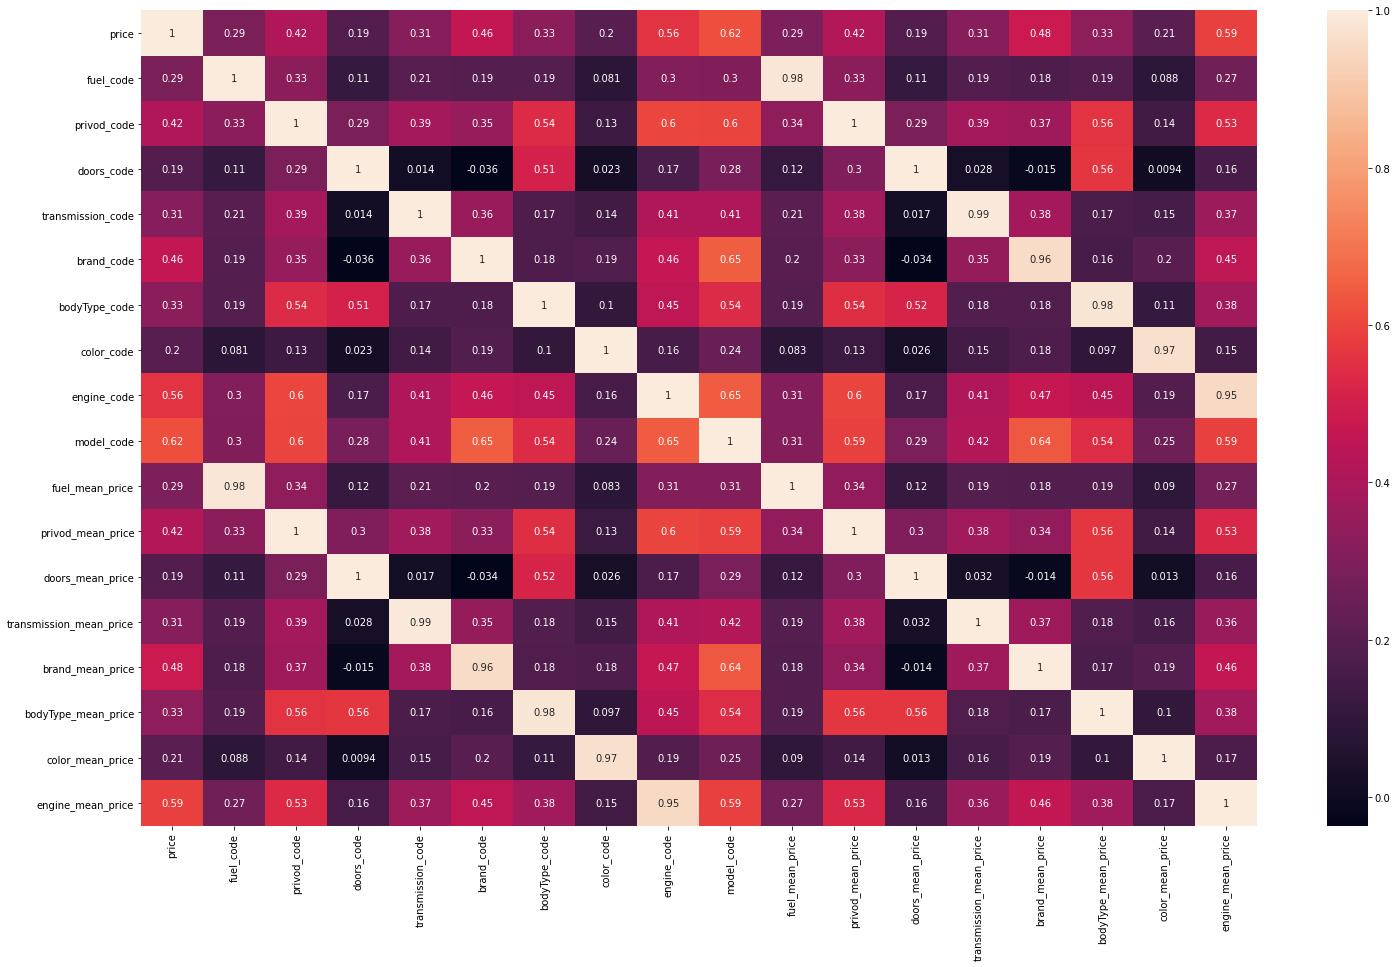

In [250]:
# Исследуем, как изменились корреляции
plt.rcParams['figure.figsize'] = (25,15)
sns.heatmap((data[data['sample']==1]).drop(['enginePower',
 'mileage',
 'productionDate',
 'sell_id',
 'vendor',
 'Владельцы',
 'ПТС',
 'Руль',
 'sample',
 'mileage_year',
 'pop_color',
 'premium_brand',], axis=1).corr(), annot=True)

Лишь в отдельных случаях (brand, engine, color) корреляция с ценой немного усилилась. В дальнейшем попробуем обучить алгоритмы с использованием кодиравания _code или _mean_price.

In [251]:
data_code = ['fuel_code',
 'privod_code',
 'doors_code',
 'transmission_code',
 'brand_code',
 'bodyType_code',
 'color_code',
 'engine_code']

data_mean_price = ['fuel_mean_price',
 'privod_mean_price',
 'doors_mean_price',
 'transmission_mean_price',
 'brand_mean_price',
 'bodyType_mean_price',
 'color_mean_price',
 'engine_mean_price']

In [252]:
# Нормируем значения в полученных столбцах

scaler = StandardScaler()

for feature in ['fuel_mean_price',
 'privod_mean_price',
 'doors_mean_price',
 'transmission_mean_price',
 'brand_mean_price',
 'bodyType_mean_price',
 'color_mean_price',
 'engine_mean_price']:
    scaler.fit(data[[feature]])
    data[f'{feature}'] = scaler.transform(data[[feature]])
  

<AxesSubplot:>

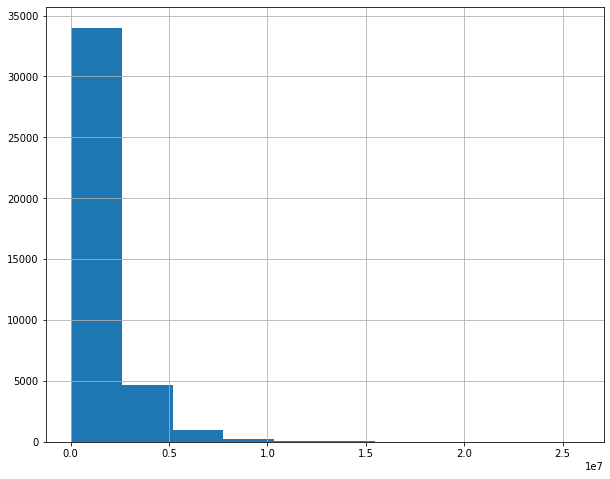

In [253]:
# Посмотрим на распределение цен
plt.rcParams['figure.figsize'] = (10,8)
data[data['sample']==1]['price'].hist()

<AxesSubplot:>

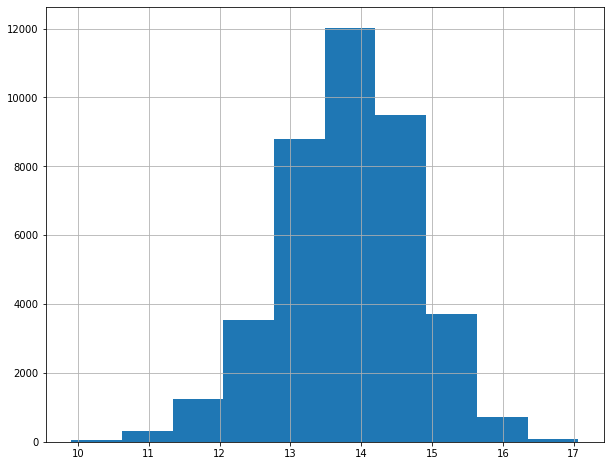

In [254]:
# Посмотрим на распределение цен
plt.rcParams['figure.figsize'] = (10,8)
np.log(data[data['sample']==1]['price']).hist()

In [255]:
data[data['price']>8000000]['sample'].value_counts()

1    291
Name: sample, dtype: int64

In [256]:
data = data.drop(data[data['price']>10000000].index)

In [257]:
data[data['sample']==0].shape

(34686, 30)

In [258]:
data[data['price']<20000]['sample'].value_counts()

0    34686
Name: sample, dtype: int64

<AxesSubplot:>

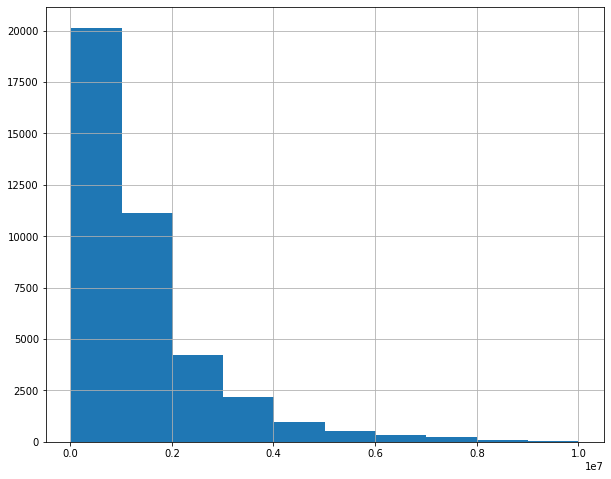

In [259]:
data[data['sample']==1]['price'].hist()

## Разделение датасета на трейн и тест

In [260]:
y = data[data['sample']==1]['price']
X = data.query('sample == 1').drop(['sample', 'price', 'sell_id',], axis=1)
X_sub = data.query('sample == 0').drop(['sample', 'price', 'sell_id',], axis=1)

In [261]:
RANDOM_SEED = 42
VAL_SIZE = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [262]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

### Следующие модели машинного обучения были выбраны на основании результатов LazyPredict

# ExtraTreesRegressor

### Построим модель сперва используя значения закодированные числами (feature_code)

In [263]:
from sklearn.ensemble import ExtraTreesRegressor
etr = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [3, 5, 6, 7, 8, 9, 10, 15, 20]
for depth in num_trees:
    model = ExtraTreesRegressor(max_depth=depth, random_state=RANDOM_SEED)
    model.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_mean_price, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_mean_price, axis=1)))
    etr['num_trees'].append(depth)
    etr['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    etr['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [264]:
etr_df = pd.DataFrame.from_dict(etr)
etr_df

,num_trees,mape_test,mape_train
0,3,37.28,36.12
1,5,25.79,24.89
2,6,23.00,22.16
3,7,20.74,19.81
4,8,18.87,17.81
5,9,17.43,15.99
6,10,16.14,14.31
7,15,13.34,6.92
8,20,13.48,1.97


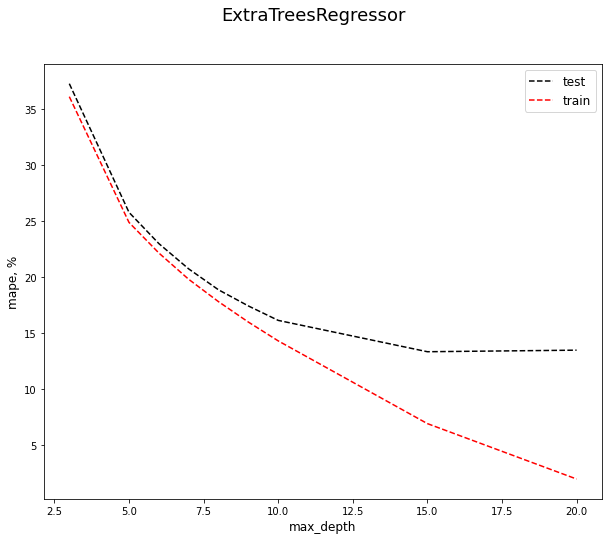

In [265]:
# При глубине леса более 15 наблюдается явное переобучение
fig, ax1 = plt.subplots()  
plt.suptitle('ExtraTreesRegressor', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(etr_df['num_trees'], etr_df['mape_test'], 'k--', etr_df['num_trees'], etr_df['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)


In [266]:
etr15 = ExtraTreesRegressor(max_depth=15, random_state=RANDOM_SEED)
etr15.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
models = [etr15]

[Text(0.5, 0, 'y_train'),
 Text(0, 0.5, 'predict_train'),
 Text(0.5, 1.0, 'Train')]

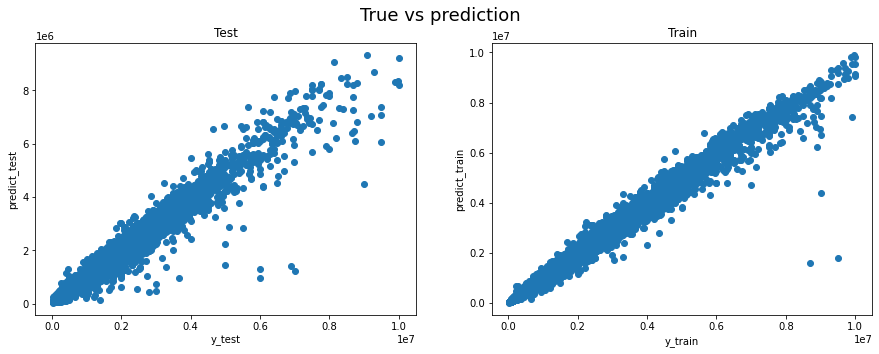

In [267]:
predict_test = np.exp(etr15.predict(X_test.drop(data_mean_price, axis=1)))
predict_train = np.exp(etr15.predict(X_train.drop(data_mean_price, axis=1)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 
plt.suptitle('True vs prediction', fontsize=18)

ax1.scatter(y_test, predict_test)

ax1.set(xlabel='y_test',ylabel='predict_test', title='Test')

ax2.scatter(y_train, predict_train)

ax2.set(xlabel='y_train',ylabel='predict_train', title='Train')

### Теперь построим модель для для данных со значениями, закодированными средней ценой (feature_mean_price)

In [268]:
etr_p = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [3, 5, 6, 7, 8, 9, 10, 15, 20]
for depth in num_trees:
    model = ExtraTreesRegressor(max_depth=depth, random_state=RANDOM_SEED)
    model.fit(X_train.drop(data_code, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_code, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_code, axis=1)))
    etr_p['num_trees'].append(depth)
    etr_p['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    etr_p['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [269]:
etr_df_p = pd.DataFrame.from_dict(etr_p)
etr_df_full = pd.merge(etr_df, etr_df_p, on='num_trees', how='left')
etr_df_full = etr_df_full.rename(columns={'mape_test_x': 'mape_test_code', 'mape_train_x': 'mape_train_code', 
                                          'mape_test_y': 'mape_test_mean_price', 'mape_train_y': 'mape_train_mean_price'})

In [270]:
etr_df_full

,num_trees,mape_test_code,mape_train_code,mape_test_mean_price,mape_train_mean_price
0,3,37.28,36.12,36.92,35.82
1,5,25.79,24.89,26.30,25.38
2,6,23.00,22.16,23.45,22.62
3,7,20.74,19.81,20.80,19.85
4,8,18.87,17.81,18.99,17.86
5,9,17.43,15.99,17.46,16.01
6,10,16.14,14.31,16.25,14.43
7,15,13.34,6.92,13.34,6.88
8,20,13.48,1.97,13.49,1.90


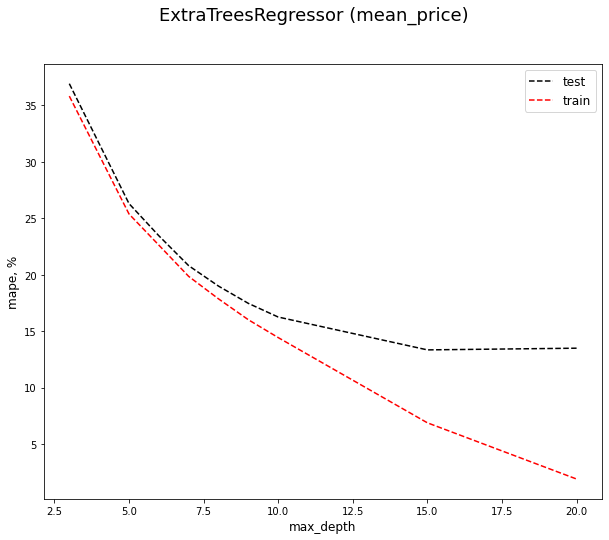

In [271]:
# Значения mape для данного датасета немного выше, чем для предыдущего.
# Заметное переобучение при глубине леса более 15.
fig, ax1 = plt.subplots()  
plt.suptitle('ExtraTreesRegressor (mean_price)', fontsize=18)

#color = 'tab:black'
ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(etr_df_p['num_trees'], etr_df_p['mape_test'], 'k--', etr_df_p['num_trees'], etr_df_p['mape_train'], 'r--')
#ax1.tick_params(axis='y')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

# LGBMRegressor

In [272]:
import lightgbm as lgb
lgb_c = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [3, 5, 6, 7, 8, 9, 10, 15, 20]
for depth in num_trees:
    model = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.01, max_depth=depth, n_estimators=200, n_jobs=-1, 
                              objective='regression', random_state = RANDOM_SEED,num_leaves=300) 
    model.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_mean_price, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_mean_price, axis=1)))
    lgb_c['num_trees'].append(depth)
    lgb_c['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    lgb_c['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [273]:
lgb_df = pd.DataFrame.from_dict(lgb_c)
lgb_df

,num_trees,mape_test,mape_train
0,3,26.39,25.34
1,5,22.03,21.11
2,6,20.73,19.77
3,7,19.69,18.62
4,8,18.93,17.64
5,9,18.42,16.93
6,10,18.26,16.67
7,15,18.22,16.53
8,20,18.22,16.52


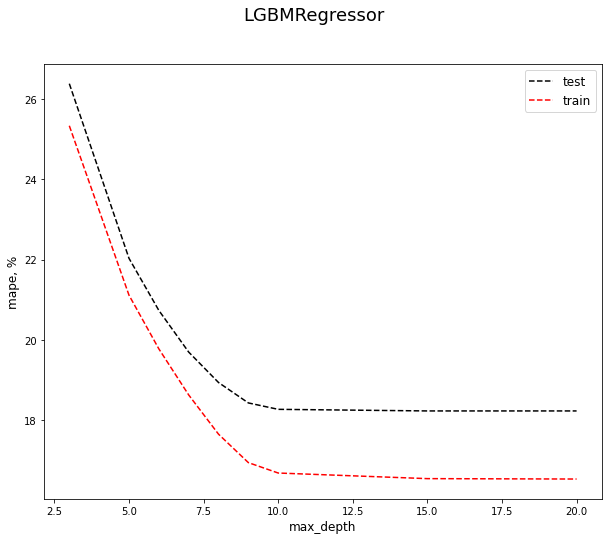

In [274]:
# При глубине леса более 10 наблюдается явное переобучение
fig, ax1 = plt.subplots()  
plt.suptitle('LGBMRegressor', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(lgb_df['num_trees'], lgb_df['mape_test'], 'k--', lgb_df['num_trees'], lgb_df['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

In [275]:
lgb10 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.01, max_depth=10, n_estimators=200, n_jobs=-1, objective='regression', 
                          random_state = RANDOM_SEED,num_leaves=300) 
lgb10.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
models.append(lgb10)

[Text(0.5, 0, 'y_train'),
 Text(0, 0.5, 'predict_train'),
 Text(0.5, 1.0, 'Train')]

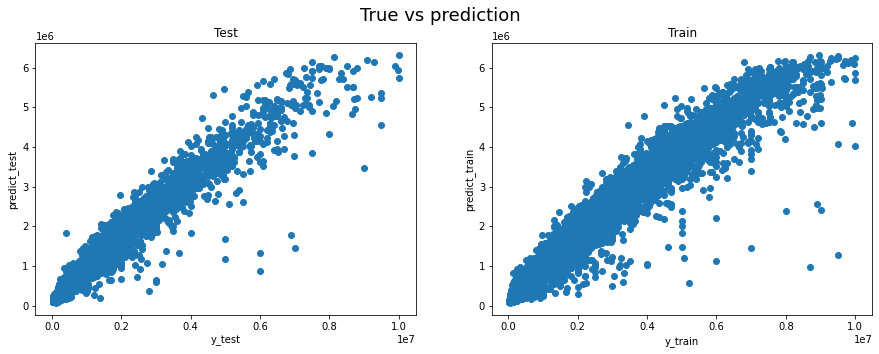

In [276]:
predict_test = np.exp(lgb10.predict(X_test.drop(data_mean_price, axis=1)))
predict_train = np.exp(lgb10.predict(X_train.drop(data_mean_price, axis=1)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 
plt.suptitle('True vs prediction', fontsize=18)

ax1.scatter(y_test, predict_test)

ax1.set(xlabel='y_test',ylabel='predict_test', title='Test')

ax2.scatter(y_train, predict_train)

ax2.set(xlabel='y_train',ylabel='predict_train', title='Train')

### Для mean_price кодированных значений

In [277]:
lgb_p = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [3, 5, 6, 7, 8, 9, 10, 15, 20]
for depth in num_trees:
    model = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.01, max_depth=depth, n_estimators=200, n_jobs=-1, 
                              objective='regression', random_state = RANDOM_SEED,num_leaves=300) 
    model.fit(X_train.drop(data_code, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_code, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_code, axis=1)))
    lgb_p['num_trees'].append(depth)
    lgb_p['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    lgb_p['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [278]:
lgb_df_p = pd.DataFrame.from_dict(lgb_p)
lgb_df_full = pd.merge(lgb_df, lgb_df_p, on='num_trees', how='left')
lgb_df_full = lgb_df_full.rename(columns={'mape_test_x': 'mape_test_code', 'mape_train_x': 'mape_train_code', 
                                          'mape_test_y': 'mape_test_mean_price', 'mape_train_y': 'mape_train_mean_price'})
lgb_df_full

,num_trees,mape_test_code,mape_train_code,mape_test_mean_price,mape_train_mean_price
0,3,26.39,25.34,26.39,25.34
1,5,22.03,21.11,22.03,21.11
2,6,20.73,19.77,20.73,19.77
3,7,19.69,18.62,19.69,18.62
4,8,18.93,17.64,18.93,17.64
5,9,18.42,16.93,18.42,16.93
6,10,18.26,16.67,18.26,16.67
7,15,18.22,16.53,18.22,16.53
8,20,18.22,16.52,18.22,16.52


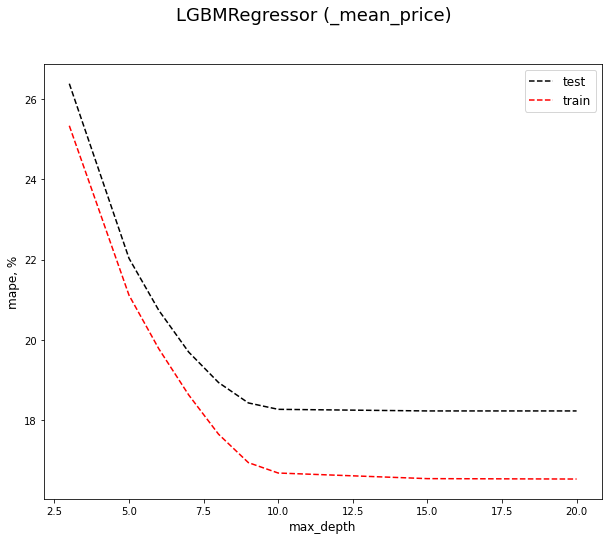

In [279]:
# Значения mape для обоих датасетов одинаковы
# При глубине леса более 10 наблюдается переобучение
fig, ax1 = plt.subplots()  
plt.suptitle('LGBMRegressor (_mean_price)', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(lgb_df_p['num_trees'], lgb_df_p['mape_test'], 'k--', lgb_df_p['num_trees'], lgb_df_p['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

# XGBRegressor

In [280]:
import xgboost as xgb
xgb_c = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
for depth in num_trees:
    model = xgb.XGBRegressor(learning_rate = 0.1, max_depth = depth, random_state = RANDOM_SEED, alpha=10, colsample_bytree = 0.8,  n_estimators = 200)
    model.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_mean_price, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_mean_price, axis=1)))
    xgb_c['num_trees'].append(depth)
    xgb_c['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    xgb_c['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [281]:
xgb_df = pd.DataFrame.from_dict(xgb_c)
xgb_df

,num_trees,mape_test,mape_train
0,2,17.38,16.80
1,3,15.71,15.04
2,4,14.81,14.05
3,5,14.31,13.44
4,6,13.96,12.90
5,7,13.68,12.53
6,8,13.58,12.19
7,9,13.47,12.03
8,10,13.45,11.85
9,15,13.37,11.54


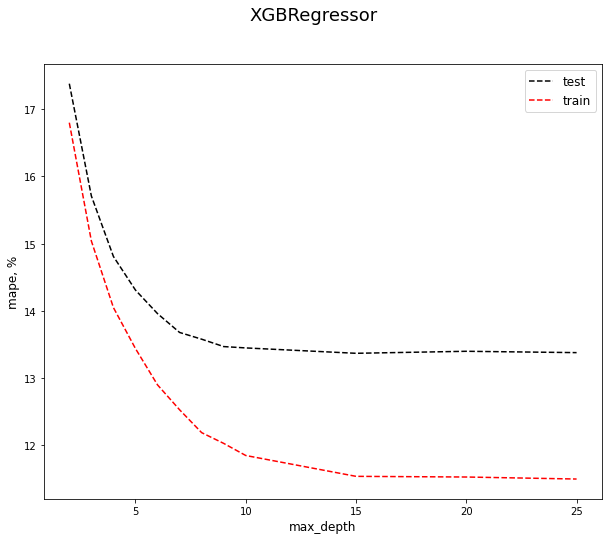

In [282]:
# При глубине леса более 15 наблюдается очень медленное изменение mape
fig, ax1 = plt.subplots()  
plt.suptitle('XGBRegressor', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(xgb_df['num_trees'], xgb_df['mape_test'], 'k--', xgb_df['num_trees'], xgb_df['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

In [283]:
xgb15 = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 15, random_state = RANDOM_SEED, alpha=10, colsample_bytree = 0.8,  n_estimators = 200)
xgb15.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
models.append(xgb15)

[Text(0.5, 0, 'y_train'),
 Text(0, 0.5, 'predict_train'),
 Text(0.5, 1.0, 'Train')]

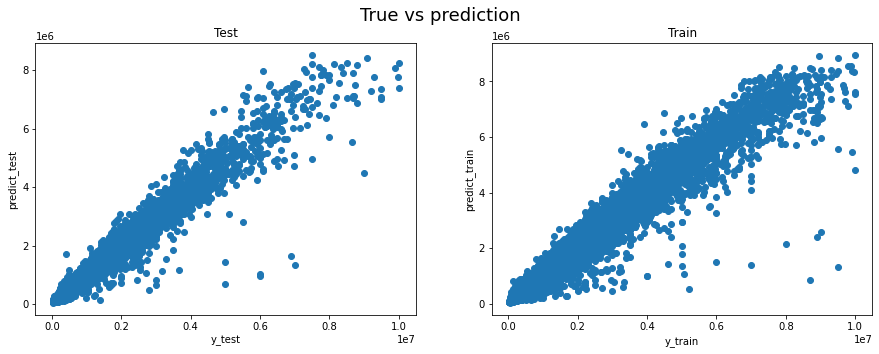

In [284]:
predict_test = np.exp(xgb15.predict(X_test.drop(data_mean_price, axis=1)))
predict_train = np.exp(xgb15.predict(X_train.drop(data_mean_price, axis=1)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 
plt.suptitle('True vs prediction', fontsize=18)

ax1.scatter(y_test, predict_test)

ax1.set(xlabel='y_test',ylabel='predict_test', title='Test')

ax2.scatter(y_train, predict_train)

ax2.set(xlabel='y_train',ylabel='predict_train', title='Train')

### Для mean_price кодированного датасета:

In [285]:
xgb_p = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
for depth in num_trees:
    model = xgb.XGBRegressor(learning_rate = 0.1, max_depth = depth, random_state = RANDOM_SEED, alpha=10, colsample_bytree = 0.8,  n_estimators = 200)
    model.fit(X_train.drop(data_code, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_code, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_code, axis=1)))
    xgb_p['num_trees'].append(depth)
    xgb_p['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    xgb_p['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [286]:
xgb_df_p = pd.DataFrame.from_dict(xgb_p)
xgb_df_full = pd.merge(xgb_df, xgb_df_p, on='num_trees', how='left')
xgb_df_full = xgb_df_full.rename(columns={'mape_test_x': 'mape_test_code', 'mape_train_x': 'mape_train_code', 
                                          'mape_test_y': 'mape_test_mean_price', 'mape_train_y': 'mape_train_mean_price'})
xgb_df_full

,num_trees,mape_test_code,mape_train_code,mape_test_mean_price,mape_train_mean_price
0,2,17.38,16.80,17.16,16.65
1,3,15.71,15.04,15.82,15.13
2,4,14.81,14.05,14.86,14.17
3,5,14.31,13.44,14.34,13.50
4,6,13.96,12.90,13.97,12.93
5,7,13.68,12.53,13.74,12.58
6,8,13.58,12.19,13.59,12.27
7,9,13.47,12.03,13.47,12.04
8,10,13.45,11.85,13.46,11.90
9,15,13.37,11.54,13.41,11.58


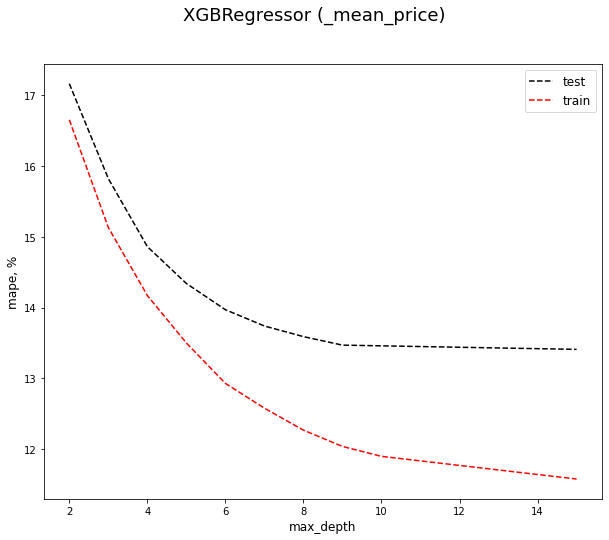

In [287]:
# Значения mape немного хуже, чем для первого датасета
fig, ax1 = plt.subplots()  
plt.suptitle('XGBRegressor (_mean_price)', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(xgb_df_p['num_trees'], xgb_df_p['mape_test'], 'k--', xgb_df_p['num_trees'], xgb_df_p['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

# RandomForestRegressor

In [288]:
from sklearn.ensemble import RandomForestRegressor
rfr_c = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [2, 5, 8, 10, 15, 20, 25, 30]
for depth in num_trees:
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state = RANDOM_SEED)
    model.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_mean_price, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_mean_price, axis=1)))
    rfr_c['num_trees'].append(depth)
    rfr_c['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    rfr_c['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [289]:
rfr_df = pd.DataFrame.from_dict(rfr_c)
rfr_df

,num_trees,mape_test,mape_train
0,2,46.37,44.94
1,5,23.11,22.15
2,8,16.88,15.69
3,10,14.73,12.66
4,15,13.15,7.31
5,20,13.19,5.17
6,25,13.24,4.82
7,30,13.24,4.79


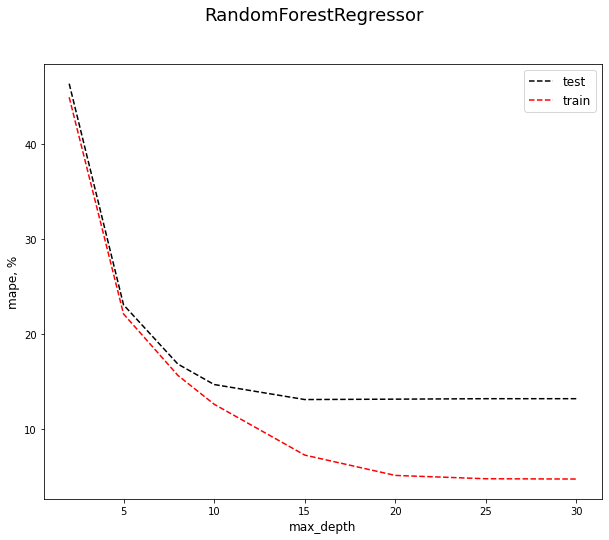

In [290]:
# При глубине леса более 15 не наблюдается улучшение mape
fig, ax1 = plt.subplots()  
plt.suptitle('RandomForestRegressor', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(rfr_df['num_trees'], rfr_df['mape_test'], 'k--', rfr_df['num_trees'], rfr_df['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

In [291]:
rfr15 = RandomForestRegressor(n_estimators=100, max_depth=15, random_state = RANDOM_SEED)
rfr15.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
models.append(rfr15)

[Text(0.5, 0, 'y_train'),
 Text(0, 0.5, 'predict_train'),
 Text(0.5, 1.0, 'Train')]

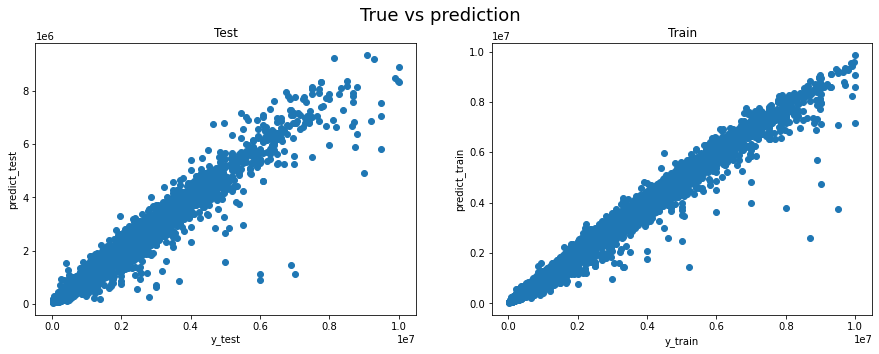

In [292]:
predict_test = np.exp(rfr15.predict(X_test.drop(data_mean_price, axis=1)))
predict_train = np.exp(rfr15.predict(X_train.drop(data_mean_price, axis=1)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 
plt.suptitle('True vs prediction', fontsize=18)

ax1.scatter(y_test, predict_test)

ax1.set(xlabel='y_test',ylabel='predict_test', title='Test')

ax2.scatter(y_train, predict_train)

ax2.set(xlabel='y_train',ylabel='predict_train', title='Train')

### Для mean_price кодированного датасета:

In [293]:
rfr_p = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
for depth in num_trees:
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state = RANDOM_SEED)
    model.fit(X_train.drop(data_code, axis=1), np.log(y_train))
    predict_test = np.exp(model.predict(X_test.drop(data_code, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_code, axis=1)))
    rfr_p['num_trees'].append(depth)
    rfr_p['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    rfr_p['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [294]:
rfr_df_p = pd.DataFrame.from_dict(rfr_p)
rfr_df_full = pd.merge(rfr_df, rfr_df_p, on='num_trees', how='left')
rfr_df_full = rfr_df_full.rename(columns={'mape_test_x': 'mape_test_code', 'mape_train_x': 'mape_train_code', 
                                          'mape_test_y': 'mape_test_mean_price', 'mape_train_y': 'mape_train_mean_price'})
rfr_df_full

,num_trees,mape_test_code,mape_train_code,mape_test_mean_price,mape_train_mean_price
0,2,46.37,44.94,46.37,44.94
1,5,23.11,22.15,23.11,22.15
2,8,16.88,15.69,16.89,15.69
3,10,14.73,12.66,14.73,12.66
4,15,13.15,7.31,13.16,7.32
5,20,13.19,5.17,NaN,NaN
6,25,13.24,4.82,NaN,NaN
7,30,13.24,4.79,NaN,NaN


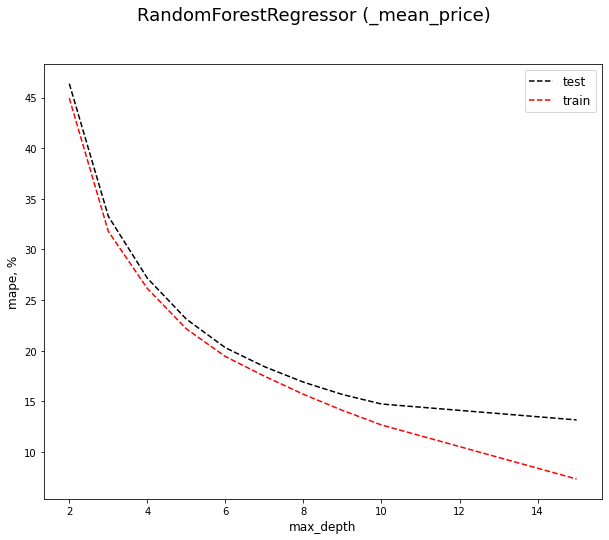

In [295]:
# Значения mape для обоих датасетов схожи
fig, ax1 = plt.subplots()  
plt.suptitle('RandomForestRegressor (_mean_price)', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(rfr_df_p['num_trees'], rfr_df_p['mape_test'], 'k--', rfr_df_p['num_trees'], rfr_df_p['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

# CatBoostRegressor

In [296]:
cbr_c = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for depth in num_trees:
    model = CatBoostRegressor(iterations = 5000, random_seed = RANDOM_SEED, eval_metric='MAPE', custom_metric=['R2', 'MAE'],
                              silent=True, learning_rate=0.1, depth=depth)
    model.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train), eval_set=(X_test.drop(data_mean_price, axis=1), np.log(y_test)),
              verbose_eval=0, use_best_model=True,)
    predict_test = np.exp(model.predict(X_test.drop(data_mean_price, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_mean_price, axis=1)))
    cbr_c['num_trees'].append(depth)
    cbr_c['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    cbr_c['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [297]:
cbr_df = pd.DataFrame.from_dict(cbr_c)
cbr_df

,num_trees,mape_test,mape_train
0,1,16.86,16.33
1,2,13.62,12.65
2,3,13.00,10.96
3,4,12.88,9.73
4,5,12.80,8.62
5,6,12.73,8.73
6,7,12.83,8.08
7,8,12.80,8.30
8,9,12.82,7.55
9,10,12.81,7.17


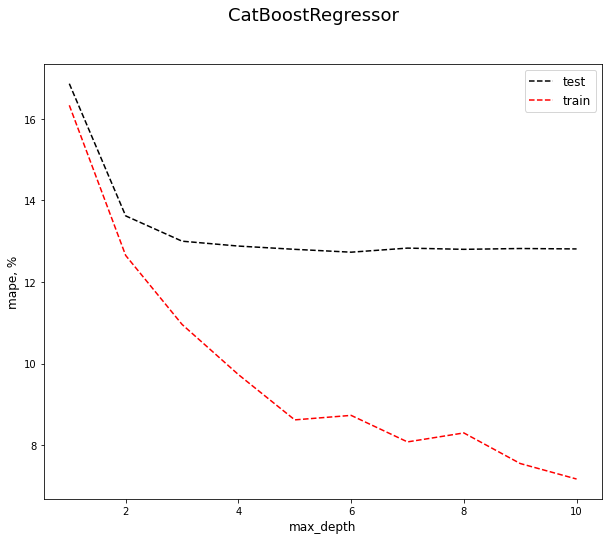

In [298]:
# При глубине леса более 5 не наблюдоется улучшение mape
fig, ax1 = plt.subplots()  
plt.suptitle('CatBoostRegressor', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(cbr_df['num_trees'], cbr_df['mape_test'], 'k--', cbr_df['num_trees'], cbr_df['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

In [330]:
cbr6 = CatBoostRegressor(iterations = 10000, random_seed = RANDOM_SEED, eval_metric='MAPE', custom_metric=['R2', 'MAE'], silent=True, learning_rate=0.1, depth=6)
cbr6.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train), eval_set=(X_test.drop(data_mean_price, axis=1), np.log(y_test)), verbose_eval=0, use_best_model=True,)
#models.append(cbr6)

In [331]:
predict_test = np.exp(cbr6.predict(X_test.drop(data_mean_price, axis=1)))
round(mape(y_test, predict_test)*100, 2)

12.73

[Text(0.5, 0, 'y_train'),
 Text(0, 0.5, 'predict_train'),
 Text(0.5, 1.0, 'Train')]

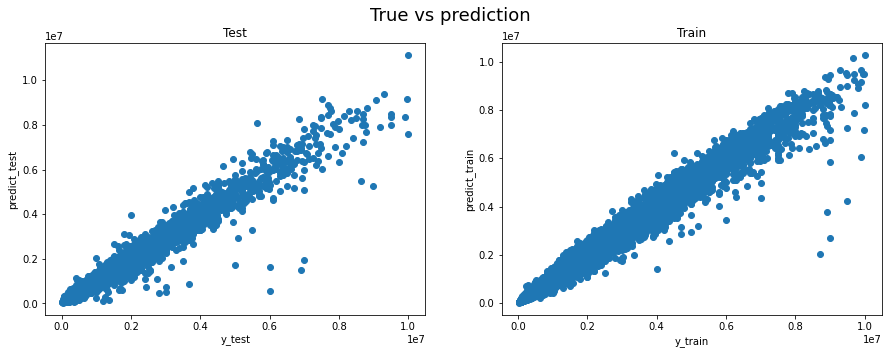

In [332]:
predict_test = np.exp(cbr6.predict(X_test.drop(data_mean_price, axis=1)))
predict_train = np.exp(cbr6.predict(X_train.drop(data_mean_price, axis=1)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 
plt.suptitle('True vs prediction', fontsize=18)

ax1.scatter(y_test, predict_test)

ax1.set(xlabel='y_test',ylabel='predict_test', title='Test')

ax2.scatter(y_train, predict_train)

ax2.set(xlabel='y_train',ylabel='predict_train', title='Train')

### Для mean_price кодированного датасета:

In [302]:
cbr_p = {'num_trees': [], 'mape_test': [], 'mape_train': []}

num_trees = [1, 2, 3, 4, 5,]
for depth in num_trees:
    model = CatBoostRegressor(iterations = 5000, random_seed = RANDOM_SEED, eval_metric='MAPE', custom_metric=['R2', 'MAE'],
                              silent=True, learning_rate=0.1, depth=depth)
    model.fit(X_train.drop(data_code, axis=1), np.log(y_train), eval_set=(X_test.drop(data_code, axis=1), np.log(y_test)),
              verbose_eval=0, use_best_model=True,)
    predict_test = np.exp(model.predict(X_test.drop(data_code, axis=1)))
    predict_train = np.exp(model.predict(X_train.drop(data_code, axis=1)))
    cbr_p['num_trees'].append(depth)
    cbr_p['mape_test'].append(round((mape(y_test, predict_test))*100, 2))
    cbr_p['mape_train'].append(round((mape(y_train, predict_train))*100, 2))

In [303]:
cbr_df_p = pd.DataFrame.from_dict(cbr_p)
cbr_df_full = pd.merge(cbr_df, cbr_df_p, on='num_trees', how='left')
cbr_df_full = cbr_df_full.rename(columns={'mape_test_x': 'mape_test_code', 'mape_train_x': 'mape_train_code', 
                                          'mape_test_y': 'mape_test_mean_price', 'mape_train_y': 'mape_train_mean_price'})
cbr_df_full

,num_trees,mape_test_code,mape_train_code,mape_test_mean_price,mape_train_mean_price
0,1,16.86,16.33,16.86,16.35
1,2,13.62,12.65,13.68,12.66
2,3,13.00,10.96,13.03,11.01
3,4,12.88,9.73,12.78,9.72
4,5,12.80,8.62,12.76,8.88
5,6,12.73,8.73,NaN,NaN
6,7,12.83,8.08,NaN,NaN
7,8,12.80,8.30,NaN,NaN
8,9,12.82,7.55,NaN,NaN
9,10,12.81,7.17,NaN,NaN


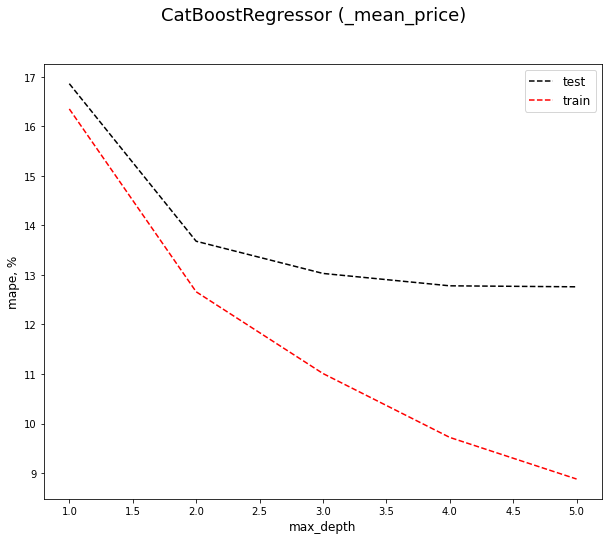

In [304]:
# Значения mape для данного датасета немного выше, чем для первого
fig, ax1 = plt.subplots()  
plt.suptitle('CatBoostRegressor (_mean_price)', fontsize=18)

ax1.set_xlabel('max_depth', fontsize=12)
ax1.set_ylabel('mape, %', fontsize=12)
h1, h2 = ax1.plot(cbr_df_p['num_trees'], cbr_df_p['mape_test'], 'k--', cbr_df_p['num_trees'], cbr_df_p['mape_train'], 'r--')
ax1.legend([h1, h2], ['test', 'train'], fontsize=12)

### Использование кодировки по средней цене не принесло положительного результа

# Стекинг

In [314]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split

class Stacking(BaseEstimator, ClassifierMixin):  

    def __init__(self, models, ens_model):
        
        self.models = models       # базовые модели для стекинга
        self.ens_model = ens_model # мета-модель
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.25, err=0.001, random_state=42):

        train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=42)

        self.valid = np.zeros((valid.shape[0], self.n))
        for t, clf in enumerate(self.models):
            clf.fit(train, y_train)
            self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        return self
    


    def predict(self, X, y=None):

        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        a = self.ens_model.predict(X_meta)
        
        return (a)

In [315]:
models

[ExtraTreesRegressor(max_depth=15, random_state=42),
 LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=200,
               num_leaves=300, objective='regression', random_state=42),
 XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 RandomForestRegressor(max_depth=15, random_state=42),

In [337]:
s1 = Stacking(models[:-1], models[-1])
s1.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
predict_test = np.exp(s1.predict(X_test.drop(data_mean_price, axis=1)))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 15.51%


In [317]:
# Без lgb10
stack = [models[0], models[2], models[3]]
stack

[ExtraTreesRegressor(max_depth=15, random_state=42),
 XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 RandomForestRegressor(max_depth=15, random_state=42)]

In [318]:
models

[ExtraTreesRegressor(max_depth=15, random_state=42),
 LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=200,
               num_leaves=300, objective='regression', random_state=42),
 XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 RandomForestRegressor(max_depth=15, random_state=42),

In [338]:
s2 = Stacking(stack, models[-1])
s2.fit(X_train.drop(data_mean_price, axis=1), np.log(y_train))
predict_test = np.exp(s2.predict(X_test.drop(data_mean_price, axis=1)))
print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 16.07%


In [333]:
# Поправка на цену в 0.91 была определена в результате серии экспериментов. Без поправки на цену результат mape на kaggle - 16.56861
predict_submission = np.exp(cbr6.predict(X_sub.drop(data_mean_price, axis=1)))
sample_submission['price'] = predict_submission*0.91             
sample_submission.to_csv('submission.csv', index=False)

In [334]:
sample_submission.describe()

,sell_id,price
count,3.468600e+04,3.468600e+04
mean,1.098300e+09,1.105609e+06
std,1.911225e+07,1.144346e+06
min,2.665000e+03,3.246645e+04
25%,1.099049e+09,4.294993e+05
50%,1.100911e+09,7.393773e+05
75%,1.101245e+09,1.354294e+06
max,1.101375e+09,1.073333e+07


<AxesSubplot:>

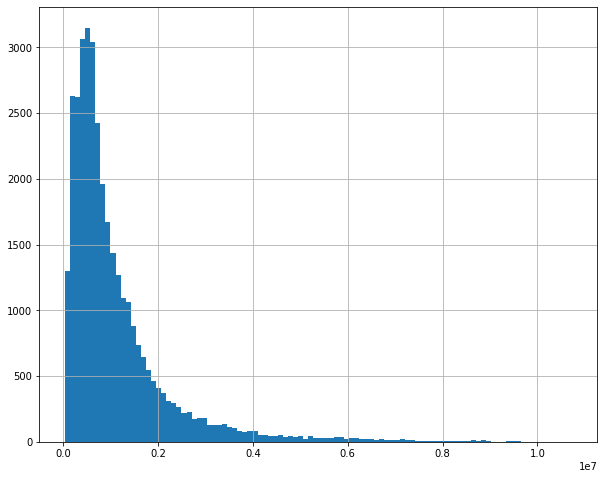

In [336]:
sample_submission['price'].hist(bins=100)

Точность модели s1 по метрике MAPE: 15.51%
Точность модели s2 по метрике MAPE: 16.07%

Точность модели cbr5 по метрике MAPE была 12.73%
Поэтому итоговой моделью была выбрана cdr5, что привело к наименьшему MAPE на kaggle - 14.3320

Кроме того, напомним, что данные результат был получен на данных с диапазоном цен до 10 000 000.
Были проведены эксперименты с полным датасетом (весь диапазон цен, полученный при парсинге) - MAPE 14.56192 на kaggle,
и с датасетом с диапазоном цен до 8 000 000 - MAPE 14.37197 на kaggle.